In [1]:
import netCDF4 as nc
import numpy as np
import pylab as plt
import xarray as xr

In /home/ckaul/.conda-envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ckaul/.conda-envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ckaul/.conda-envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ckaul/.conda-envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ckaul/.conda-envs/m

In [7]:
mycolors = ['C0','C1','C2','C3','C4','C5']

# Open the AMR-Wind statistics files

In [9]:
date = '20170619'
maindir = '/projects/awaken/ckaul/wrfForcing/'+ date +'/'

tags = []
h_sim = {}
t_sim = {}
xtime0 = xr.open_mfdataset(maindir+'momD_tempD/post_processing/abl_statistics*.nc')
xprof0 = xr.open_mfdataset(maindir+ 'momD_tempD/post_processing/abl_statistics*.nc',group='mean_profiles')
tag0 ='D/D'
tags.append(tag0)
h_sim[tag0] = xprof0.variables['h'].values#[0,:]
t_sim[tag0] = xtime0.variables['time'].values


xtime1 = xr.open_mfdataset(maindir+'momI_tempI/post_processing/abl_statistics*.nc')
xprof1 = xr.open_mfdataset(maindir+ 'momI_tempI/post_processing/abl_statistics*.nc',group='mean_profiles')
tag1 ='I/I'
tags.append(tag1)
h_sim[tag1] = xprof1.variables['h'].values#[0,:]
t_sim[tag1] = xtime1.variables['time'].values


xtime2 = xr.open_mfdataset(maindir+'momI_tempI_wenoz/post_processing/abl_statistics*.nc')
xprof2 = xr.open_mfdataset(maindir+ 'momI_tempI_wenoz/post_processing/abl_statistics*.nc',group='mean_profiles')
tag2 ='I/I,weno'
tags.append(tag2)
h_sim[tag2] = xprof2.variables['h'].values#[0,:]
t_sim[tag2] = xtime2.variables['time'].values


xtime3 = xr.open_mfdataset(maindir+'momI_tempI_z0/post_processing/abl_statistics*.nc')
xprof3 = xr.open_mfdataset(maindir+ 'momI_tempI_z0/post_processing/abl_statistics*.nc',group='mean_profiles')
tag3 ='I/I,weno_Z + z0'
tags.append(tag3)
h_sim[tag3] = xprof3.variables['h'].values#[0,:]
t_sim[tag3] = xtime3.variables['time'].values


xtime_list = [xtime0,xtime1,xtime2, xtime3]
xprof_list = [xprof0,xprof1,xprof2, xprof3]



# Open the forcing data file

In [23]:
forcing = nc.Dataset('/projects/awaken/ckaul/wrfForcing/20170619/forcing_'+date+'_v0.nc')

hf = forcing.variables['heights'][:]
tf = forcing.variables['times'][:]
ntf = len(tf)
nhf = len(hf)

60.0 0.0


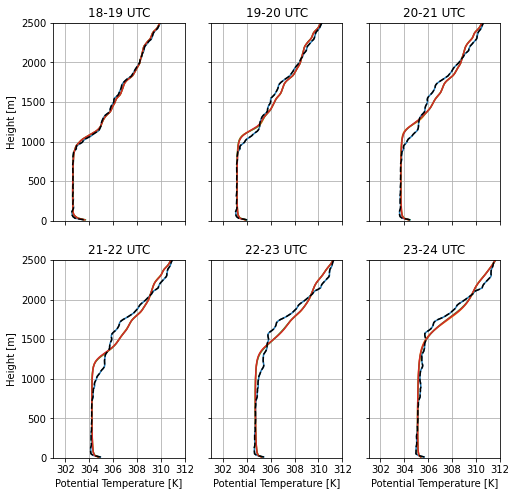

In [76]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
   
    ax[0,0].plot(np.mean(xprof['theta'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['theta'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['theta'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['theta'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['theta'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['theta'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

wrfvar=np.reshape(forcing.variables['wrf_temperature'][:], (ntf,nhf))
hrwidth = int(3600./tf[1])
print(tf[1],tf[0])
ax[0,0].plot(np.mean(wrfvar[0*hrwidth:1*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,1].plot(np.mean(wrfvar[1*hrwidth:2*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,2].plot(np.mean(wrfvar[2*hrwidth:3*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')

ax[1,0].plot(np.mean(wrfvar[3*hrwidth:4*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,1].plot(np.mean(wrfvar[4*hrwidth:5*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,2].plot(np.mean(wrfvar[5*hrwidth:6*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')



ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(301,312)
for i in np.arange(3):
    ax[1,i].set_xlabel('Potential Temperature [K]')
    ax[1,i].set_xticks(np.arange(302,314,2))
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


60.0 0.0


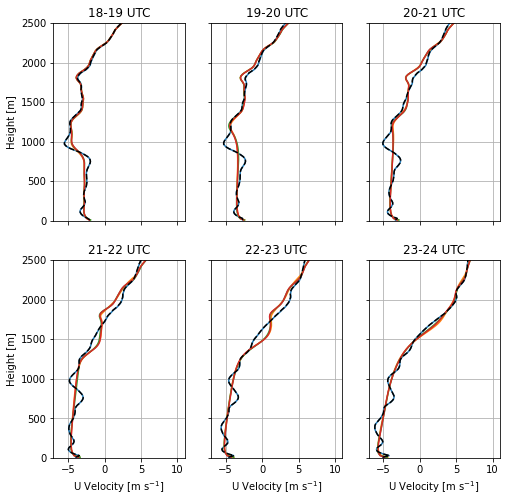

In [78]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))

    
  
    ax[0,0].plot(np.mean(xprof['u'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['u'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['u'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['u'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['u'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['u'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

wrfvar=np.reshape(forcing.variables['wrf_momentum_u'][:], (ntf,nhf))
hrwidth = int(3600./tf[1])
print(tf[1],tf[0])
ax[0,0].plot(np.mean(wrfvar[0*hrwidth:1*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,1].plot(np.mean(wrfvar[1*hrwidth:2*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,2].plot(np.mean(wrfvar[2*hrwidth:3*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')

ax[1,0].plot(np.mean(wrfvar[3*hrwidth:4*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,1].plot(np.mean(wrfvar[4*hrwidth:5*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,2].plot(np.mean(wrfvar[5*hrwidth:6*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')



ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-7,11)
for i in np.arange(3):
    ax[1,i].set_xlabel(r'U Velocity [m s$^{-1}$]')
    ax[1,i].set_xticks(np.arange(-5,15,5))
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


150.0
150.0
150.0
150.0
60.0 0.0


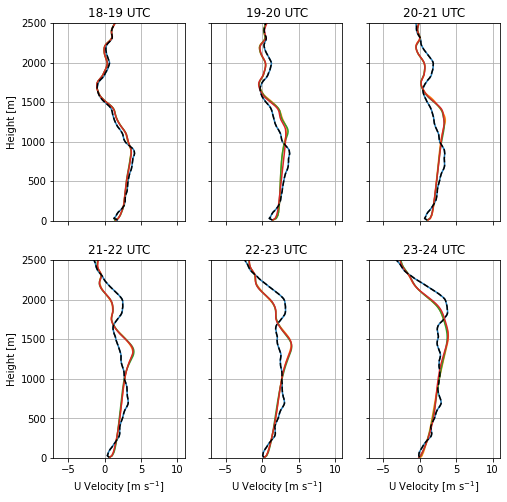

In [79]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['v'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['v'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['v'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['v'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['v'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['v'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    


wrfvar=np.reshape(forcing.variables['wrf_momentum_v'][:], (ntf,nhf))
hrwidth = int(3600./tf[1])
print(tf[1],tf[0])
ax[0,0].plot(np.mean(wrfvar[0*hrwidth:1*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,1].plot(np.mean(wrfvar[1*hrwidth:2*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[0,2].plot(np.mean(wrfvar[2*hrwidth:3*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')

ax[1,0].plot(np.mean(wrfvar[3*hrwidth:4*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,1].plot(np.mean(wrfvar[4*hrwidth:5*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
ax[1,2].plot(np.mean(wrfvar[5*hrwidth:6*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')



ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-7,11)
for i in np.arange(3):
    ax[1,i].set_xlabel(r'U Velocity [m s$^{-1}$]')
    ax[1,i].set_xticks(np.arange(-5,15,5))
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


150.0
150.0
150.0
150.0


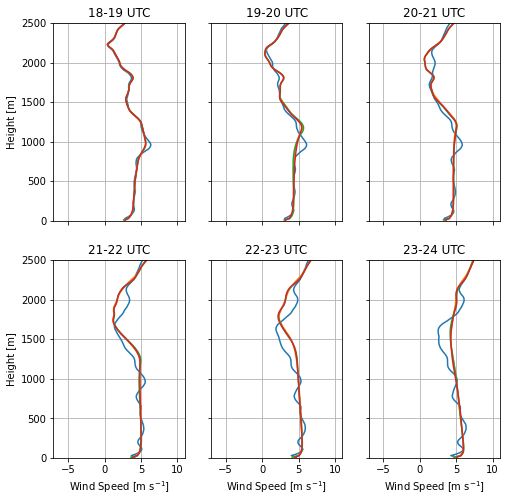

In [80]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['hvelmag'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['hvelmag'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['hvelmag'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['hvelmag'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['hvelmag'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['hvelmag'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

# #
# wrfvar=np.reshape(forcing.variables['wrf_momentum_u'][:], (ntf,nhf))
# hrwidth = int(3600./tf[1])
# print(tf[1],tf[0])
# ax[0,0].plot(np.mean(wrfvar[0*hrwidth:1*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
# ax[0,1].plot(np.mean(wrfvar[1*hrwidth:2*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
# ax[0,2].plot(np.mean(wrfvar[2*hrwidth:3*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')

# ax[1,0].plot(np.mean(wrfvar[3*hrwidth:4*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
# ax[1,1].plot(np.mean(wrfvar[4*hrwidth:5*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')
# ax[1,2].plot(np.mean(wrfvar[5*hrwidth:6*hrwidth,:],axis=0),hf, linestyle='dashed', color='black', label='Forcing')



ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-7,11)
for i in np.arange(3):
    ax[1,i].set_xlabel(r'Wind Speed [m s$^{-1}$]')
    ax[1,i].set_xticks(np.arange(-5,15,5))
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


150.0
150.0
150.0
150.0


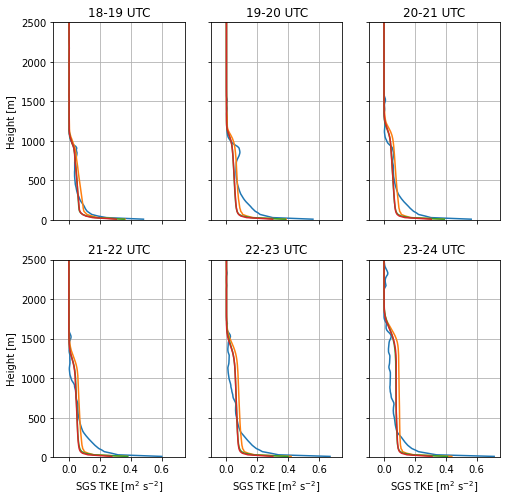

In [83]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['k_sgs'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['k_sgs'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['k_sgs'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['k_sgs'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['k_sgs'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['k_sgs'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    





ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-0.1,0.75)
for i in np.arange(3):
    ax[1,i].set_xlabel(r'SGS TKE [m$^2$ s$^{-2}$]')
    ax[1,i].set_xticks(np.arange(0,0.8,0.2))
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


150.0
150.0
150.0
150.0


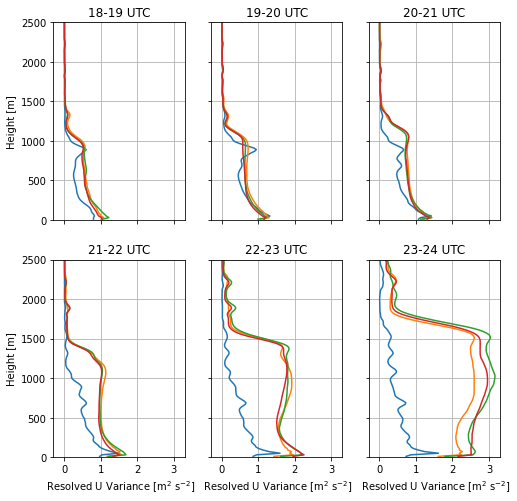

In [85]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['u\'u\'_r'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['u\'u\'_r'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['u\'u\'_r'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['u\'u\'_r'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['u\'u\'_r'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['u\'u\'_r'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

# 



ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-0.3,3.3)
for i in np.arange(3):
    ax[1,i].set_xlabel(r' Resolved U Variance [m$^2$ s$^{-2}$]')
    ax[1,i].set_xticks([0,1,2,3])
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


150.0
150.0
150.0
150.0


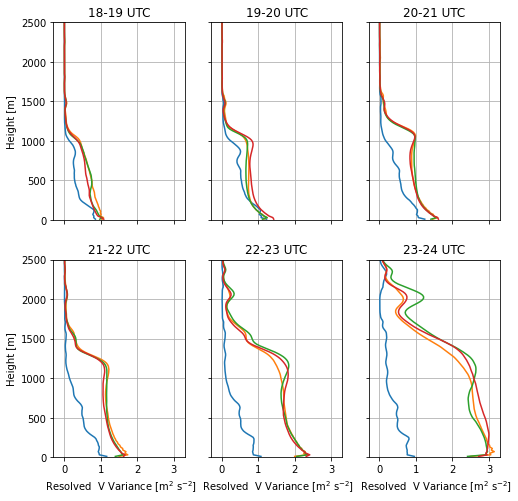

In [86]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['v\'v\'_r'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['v\'v\'_r'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['v\'v\'_r'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['v\'v\'_r'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['v\'v\'_r'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['v\'v\'_r'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

#


ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-0.3,3.3)
for i in np.arange(3):
    ax[1,i].set_xlabel(r' Resolved  V Variance [m$^2$ s$^{-2}$]')
    ax[1,i].set_xticks([0,1,2,3])
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')


In [87]:
#wstat = nc.Dataset('/projects/awaken/ckaul/wrfForcing/20170628/225451/sgpdlprofwstats4newsC1.c1.20170628.000000.nc')
wstat = nc.Dataset('/projects/awaken/ckaul/wrfForcing/20170619/sgpdlprofwstats4newsC1.c1.20170619.000000.nc')
# print(wstat.variables.keys())
wvar = wstat.variables['w_variance'][:,:]
snr = wstat.variables['snr'][:,:]
noise = wstat.variables['noise'][:,:]

wvar = np.ma.masked_where(snr <0.008, wvar)
# wvar = np.ma.masked_where(noise > 1, wvar)

wstat_time = wstat.variables['time'][:]
indices = np.arange(len(wstat_time))
valid_indices = indices[np.abs(wstat_time -18.5*3600)<1900]
print(wstat_time[valid_indices[0]],wstat_time[valid_indices[-1]])

64800.0 68400.0


150.0
150.0
150.0
150.0


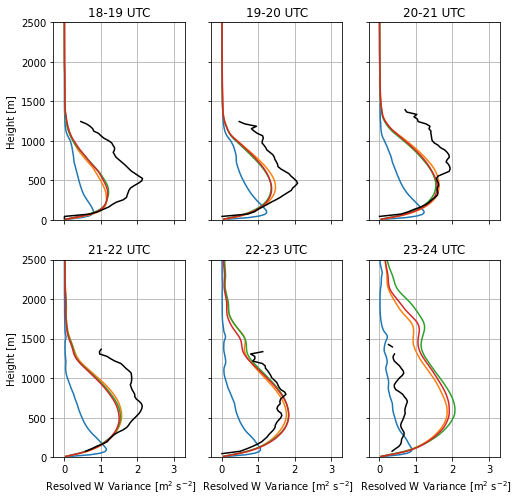

In [88]:
fig, ax = plt.subplots(figsize=(8,8), ncols=3,nrows=2, sharey=True, sharex=True)
for i, xprof in enumerate(xprof_list):
    
    tag = tags[i]
    hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    print(t_sim[tag][0])
    
  
    ax[0,0].plot(np.mean(xprof['w\'w\'_r'].values[0*hrwidth:1*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[0,1].plot(np.mean(xprof['w\'w\'_r'].values[1*hrwidth:2*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[0,2].plot(np.mean(xprof['w\'w\'_r'].values[2*hrwidth:3*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,0].plot(np.mean(xprof['w\'w\'_r'].values[3*hrwidth:4*hrwidth,:],axis=0),h_sim[tag][:], label=tag)

    ax[1,1].plot(np.mean(xprof['w\'w\'_r'].values[4*hrwidth:5*hrwidth,:],axis=0),h_sim[tag][:], label=tag)
    ax[1,2].plot(np.mean(xprof['w\'w\'_r'].values[5*hrwidth:6*hrwidth,:],axis=0),h_sim[tag][:], label=tag)    

indices = np.arange(len(wstat_time))

valid_indices = indices[np.abs(wstat_time -18.5*3600)<1900]
ax[0,0].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')

valid_indices = indices[np.abs(wstat_time -19.5*3600)<1900]
ax[0,1].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')

valid_indices = indices[np.abs(wstat_time -20.5*3600)<1900]
ax[0,2].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')

valid_indices = indices[np.abs(wstat_time -21.5*3600)<1900]
ax[1,0].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')

valid_indices = indices[np.abs(wstat_time -22.5*3600)<1900]
ax[1,1].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')

valid_indices = indices[np.abs(wstat_time -23.5*3600)<1900]
ax[1,2].plot(np.ma.mean(wvar[valid_indices,:],axis=0), wstat.variables['height'][:], color='black')




ax[0,0].set_ylim(0,2500)
ax[0,0].set_xlim(-0.3,3.3)
for i in np.arange(3):
    ax[1,i].set_xlabel(r' Resolved W Variance [m$^2$ s$^{-2}$]')
    ax[1,i].set_xticks([0,1,2,3])
for j in np.arange(2):
    ax[j,0].set_ylabel('Height [m]')

for i,current_ax in enumerate(ax.flatten()):
    current_ax.grid(True)
    current_ax.set_title(str(18+i)+'-'+str(19+i)+' UTC')
